In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

## Вычисление определенного интеграла

In [11]:
def f(x):
    return np.cos(x)

Определенный интеграл на отрезке $[0, \pi]$ должен быть равен нулю. Это критерий проверки

### Метод прямоугольников

Можно использовать левые, правые и средние прямоугольники. Все зависит от того, как задана функция. Если есть аналитический вид функции, то можно использовать метод средних прямоугольников, что будет более точно. Если функция задана дискретным набором точек, то придется использовать левые или правые прямоугольники и проиграть в точности

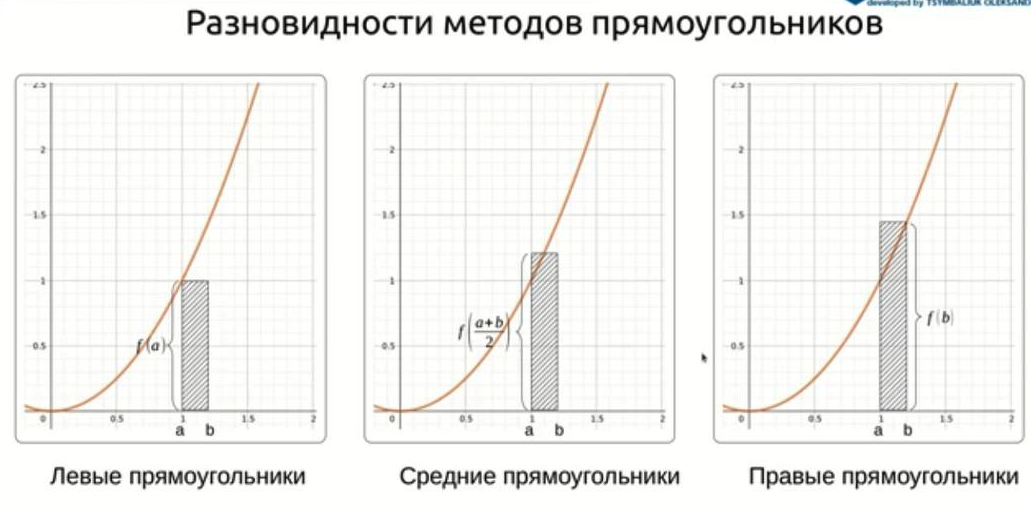

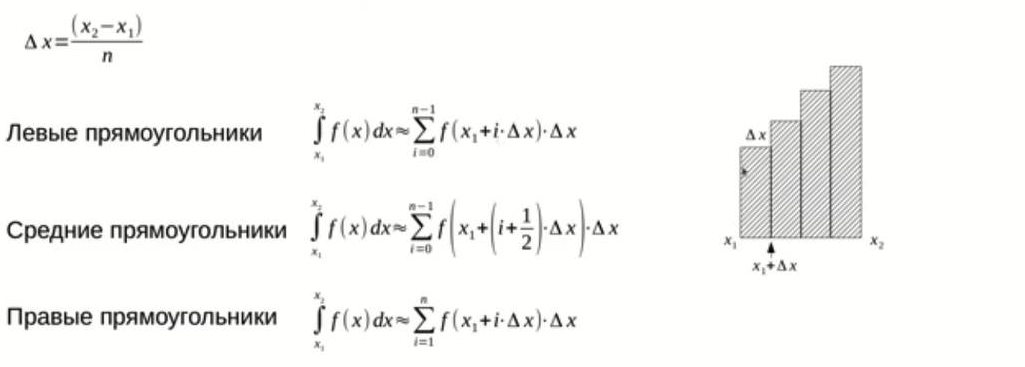

Случай, когда функция задана аналитически

In [16]:
def left_rect_method(end, step):
    x_pnt = np.linspace(0, end, int(end/step))
    res_sum = 0
    for i in range(len(x_pnt) - 1):
        res_sum += f(x_pnt[i]) * step
    return res_sum

In [19]:
end_point = np.pi
step = 0.0001
print('Значение определенного интеграла [0, Pi]',left_rect_method(end_point, step))

Значение определенного интеграла [0, Pi] 0.00010000000000000417


In [20]:
def right_rect_method(end, step):
    x_pnt = np.linspace(0, end, int(end/step))
    res_sum = 0
    for i in range(1, len(x_pnt)):
        res_sum += f(x_pnt[i]) * step
    return res_sum

In [23]:
step = 0.0001
print('Значение определенного интеграла [0, Pi]',right_rect_method(end_point, step))

Значение определенного интеграла [0, Pi] -9.999999999997741e-05


In [25]:
def mid_rect_method(end, step):
    x_pnt = np.linspace(0, end, int(end/step))
    res_sum = 0
    for i in range(1, len(x_pnt)):
        res_sum += f(x_pnt[i - 1] + (x_pnt[i] - x_pnt[i - 1]) / 2) * step
    return res_sum

In [26]:
step = 0.0001
print('Значение определенного интеграла [0, Pi]',mid_rect_method(end_point, step))

Значение определенного интеграла [0, Pi] 3.513492665210838e-16


Как и следовало ожидать, метод средних прямоугольников, дает наивышую точность из всех, но он недоступен при дискретном задании функции

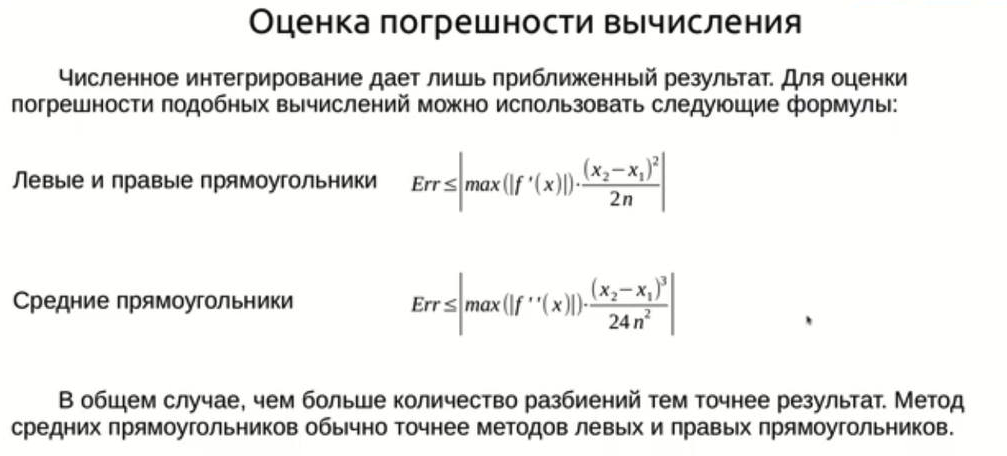

### Метод трапеций

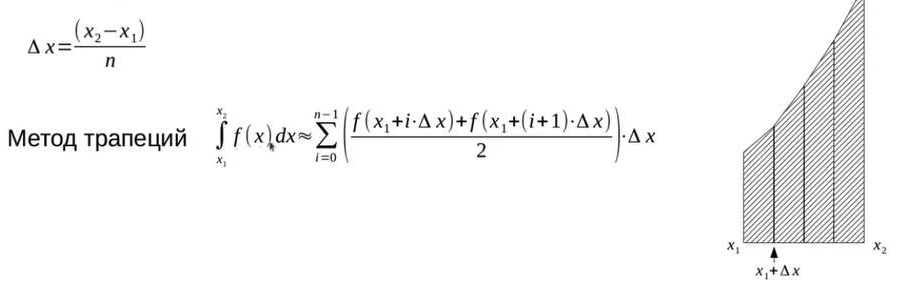

In [27]:
def trapezoid(end, step):
    x_pnt = np.linspace(0, end, int(end/step))
    res_sum = 0
    for i in range(1, x_pnt.shape[0]):
        res_sum += (f(x_pnt[i - 1]) + f(x_pnt[i])) / 2 * step
    return res_sum

In [29]:
end_pnt = np.pi
step = 0.01
print('Значение определенного интеграла [0, Pi]',trapezoid(end_point, step))

Значение определенного интеграла [0, Pi] -5.204170427930421e-18


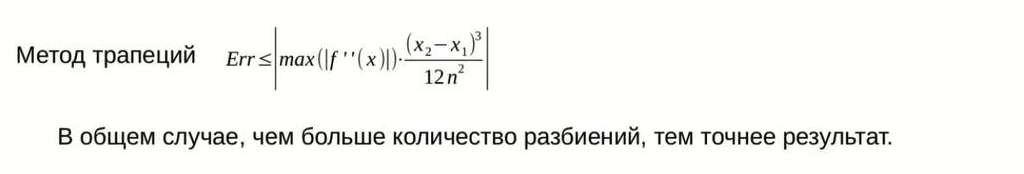

### Метод парабол (Симпсона)

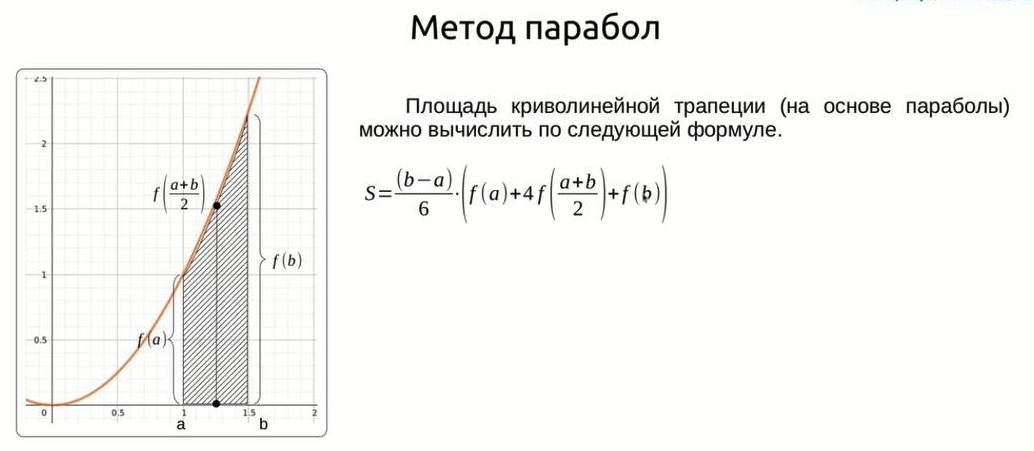

In [30]:
def simpson(end, step):
    x_pnt = np.linspace(0, end, int(end/step))
    res_sum = 0
    for i in range(1, x_pnt.shape[0]):
        res_sum += step / 6 * (f(x_pnt[i - 1]) + 4 * f(x_pnt[i - 1] + step/2) + f(x_pnt[i]))
    return res_sum

In [32]:
end_pnt = np.pi
step = 0.001
print('Значение определенного интеграла [0, Pi]',simpson(end_point, step))

Значение определенного интеграла [0, Pi] 3.3797160037480137e-07


## Вычисление неопределенного интеграла

In [71]:
def velocity(t):
    return -np.sin(t)

Неопределенный интеграл от $v(t) = -sin(t)$, равен $x(t) = cos(t) + C$. Где константа, определяется из начальных условий и для $x(0) = 0$, получим $C = -1$

In [72]:
x0 = 0
dt = 0.001
end_time = 2 * np.pi
t_pnt = np.linspace(0, end_time, int(end_time / dt))
v_pnt = velocity(t_pnt)

Основной алгоритм построен, на следующей идеи:

$V(t) = \frac{dx}{dt}$. Если переписать это следующим образом:

$V_{0} = (x_{1} - x_{0})/dt$. Тогда получаем следующую рекурентную формулу:

$x_{i} = V_{i - 1}*dt + x_{i - 1}$

Начиная с точки $x_{0}$, которая известна из начальных условий, продолжаем вычислять первообразную

In [73]:
x_pnt = [x0]
for i in range(1, v_pnt.shape[0]):
    x_pnt.append(v_pnt[i] * dt + x_pnt[i - 1])

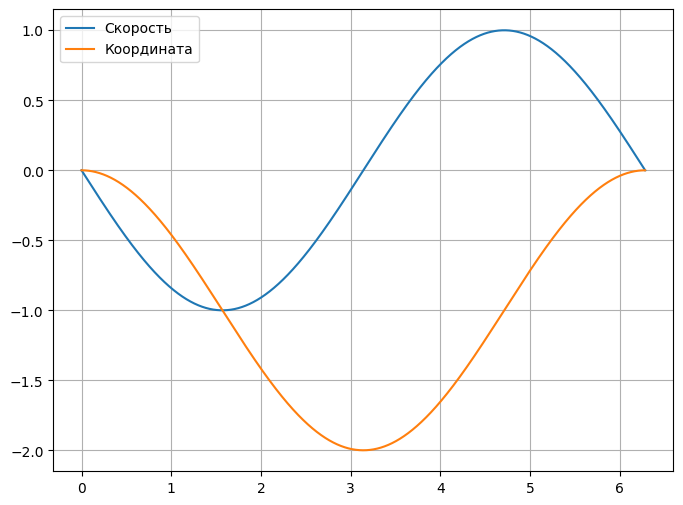

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(t_pnt, v_pnt, label='Скорость')
ax.plot(t_pnt, x_pnt, label='Координата')
ax.legend()